# Scikit-learn library

Scikit-learn (or sklearn) is the most popular python library for "traditional" machine learning problems.


It provides a long set of models for classification, regression and clustering as well as feature engineering, evaluation, train-test split and hyperparameter optimisation


## Classification



sklearn offers a collection of ready-to-use classification algorithms.


The most commonly used in practice are 

- Naive Bayes
- LogisticRegression
- Support Vector Machines
- RandomForests
- GradientTrees


The sklearn API uses throughout the `model.fit()` function to train a model 

In order to make predictions, we use 

`model.predict()`
or

`model.predict_proba()` if the model supports probabilistic interpretation (eg returns a probability confidence score for the classes)


Models that support `predict_proba` are LogisticRegression, NaiveBayes, RandomForests and EnsembleTrees

Support Vector Machines do not support this by default, however is a very good model and it is commonly used in practice because for certain problems it achieves very high performance

## Regression



Similarly, sklearn offers a rich collection of regression models

- Linear Regression
- Support Vector Machines
- RandomForestRegresors
- GradientTreeRegressors


The sklearn API uses throughout the `model.fit()` function to train a model 

In order to make predictions, we use 

`model.predict()`




# Model Evaluation



Model evaluation depends on the nature of the problem.


### Classification

In classification models we typically use accuracy when the classes are roughly equal in size. When the classes are imbalanced however, accuracy is not a good metric as the dominant class will prevail and we will report high accuracy by default.

A better measure in this case is F1-score, which is a combination of Precision and Recall. 

 

For classification tasks, the terms true positives, true negatives, false positives, and false negatives compare the results of the classifier under test with trusted external judgments.

The terms positive and negative  refer to the classifier's prediction (sometimes known as the expectation), and the terms true and false refer to whether that prediction corresponds to the external judgment (sometimes known as the observation).

So `tp` is correctly classified as "positive"
So `tn` is correctly classified as "negative"
So `fp` is incorrectly classified as "positive"
So `fn` is incorrectly classified as "negative"




$$ precision = \frac{ tp } { tp + fp } $$

$$ recall = \frac{ tp } { tp + fn } $$




Then the F1-score is defined to be the harmonic mean of precision and recall


$$ F = 2 \frac{ precision * recall } { precision + recall } $$



precision and recall are also met in the context of Information Retrieval:


for a text search on a set of documents, **precision** is the number of correct results divided by the number of all returned results.




Similarly, for a text search on a set of documents, **recall** is the number of correct results divided by the number of results that should have been returned.




### Regression


Here, we compare real numbers, predicted vs actuall

In this scenario, them most commonly used metrics are the following:


`metrics.mean_squared_error(y_true, y_pred, *)` 

which calculates the mean squared error between predictions and actuals


$$ \frac{ \sum_i^n { (y_i - x_i)^2 } }{n} $$ 


`metrics.r2_score(y_true, y_pred, *[, …])` 

the R^2 (coefficient of determination) regression score function. 


$$ \tilde{y} =  \frac{ \sum_i^n { y_i } }{n} $$ 

$$ SS_{tot} = \sum{ (y_i - y )^2 } $$

$$ SS_{res} = \sum_i{ (y_i - f_i)^2 } = \sum_i{ e_i^2 } $$

$$ R^2 = 1 - \frac{ SS_{res} } { SS_{tot} } $$

and 

`metrics.mean_absolute_error(y_true, y_pred, *)`

which returns the mean absolute error between actuals and predictions  $$ \frac{ \sum_i^n { |y_i - x_i| } }{n} $$ 





## Clustering


For clustering sklearn offers again a rich set of algorithms

The most common ones are 

- KMeans
- DBScan
- AgglomerativeClustering (Hierachical Clustering)


The models work with a similar pattern to classification `model.fit()` to fit the data and `fit_predict` to fit the model and return the assigned cluster to each data point  


## Feature Engineering


The `sklearn.feature_extraction` module can be used to extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image.


This module contains very useful libraries for text feature engineering, eg represent texts as vectors that can be fed into machine learning algorithms.


#### The Bag of Words representation 

Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

In order to address this, scikit-learn provides utilities for the most common ways to extract numerical features from text content, namely:

tokenizing strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.

counting the occurrences of tokens in each document.

normalizing and weighting with diminishing importance tokens that occur in the majority of samples / documents.

In this scheme, features and samples are defined as follows:

each individual token occurrence frequency (normalized or not) is treated as a feature.

the vector of all the token frequencies for a given document is considered a multivariate sample.

A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.


### CountVectorizer 

>>> corpus = [
...     'This is the first document.',
...     'This is the second second document.',
...     'And the third one.',
...     'Is this the first document?',
... ]
>>> X = vectorizer.fit_transform(corpus)





### TfidfVectorizer 

>>> from sklearn.feature_extraction.text import TfidfVectorizer
>>> vectorizer = TfidfVectorizer()
>>> vectorizer.fit_transform(corpus)




## Hyperparameter Optimisation

 
 
 #### GridSearchCV 
 
`model_selection.GridSearchCV(estimator, …)` 

Exhaustive search over specified parameter values for an estimator.


```python
>>> from sklearn import svm, datasets
>>> from sklearn.model_selection import GridSearchCV
>>> iris = datasets.load_iris()
>>> parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
>>> svc = svm.SVC()
>>> clf = GridSearchCV(svc, parameters)
>>> clf.fit(iris.data, iris.target)
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
>>> sorted(clf.cv_results_.keys())
['mean_fit_time', 'mean_score_time', 'mean_test_score',...
 'param_C', 'param_kernel', 'params',...
 'rank_test_score', 'split0_test_score',...
 'split2_test_score', ...
 'std_fit_time', 'std_score_time', 'std_test_score']
```


#### RandomizedSearchCV


`model_selection.RandomizedSearchCV(…[, …])`

Randomized search on hyper parameters.





```python

>>> from sklearn.datasets import load_iris
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.model_selection import RandomizedSearchCV
>>> from scipy.stats import uniform
>>> iris = load_iris()
>>> logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
...                               random_state=0)
>>> distributions = dict(C=uniform(loc=0, scale=4), #[loc, loc + scale].
...                      penalty=['l2', 'l1'])
>>> clf = RandomizedSearchCV(logistic, distributions, random_state=0)
>>> search = clf.fit(iris.data, iris.target)
>>> search.best_params_
{'C': 2..., 'penalty': 'l1'}
``` 








## Pipelines

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a ‘__’,
as in the example below. A step’s estimator may be replaced entirely by setting the parameter with its name to another estimator, or a transformer removed by setting it to ‘passthrough’ or None.




```python
>>> from sklearn.svm import SVC
>>> from sklearn.preprocessing import StandardScaler
>>> from sklearn.datasets import make_classification
>>> from sklearn.model_selection import train_test_split
>>> from sklearn.pipeline import Pipeline
>>> X, y = make_classification(random_state=0)
>>> X_train, X_test, y_train, y_test = train_test_split(X, y,
...                                                     random_state=0)
>>> pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
>>> # The pipeline can be used as any other estimator
>>> # and avoids leaking the test set into the train set
>>> pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])
>>> pipe.score(X_test, y_test)
0.88

````

### Chaining PCA and Logistic Regression

Best parameter (CV score=0.920):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 45}


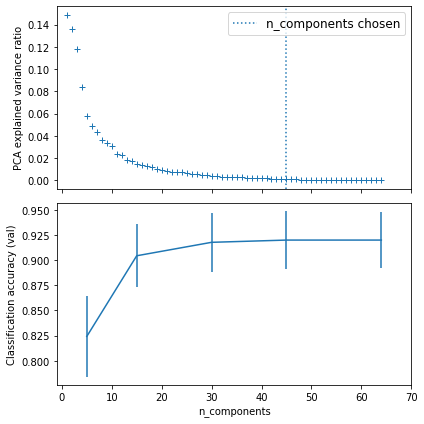

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

X_digits, y_digits = datasets.load_digits(return_X_y=True)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()